In [ ]:
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/NUCHI201908DATA2/blob/master/Lessons/06-Python-APIs/2/Activities/05-Ins_OpenWeatherDataFrame/Solved/Ins_OpenWeatherDataFrame.ipynb


In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [23]:
print(weather_api_key)

761baeeb2bf8ccaf0f4f10c5ec153aa8


In [24]:
#Read in CSV file
df=pd.read_csv(output_data_file)
df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [25]:
len(df)

548

### Generate Cities List


In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls

   * Perform a weather check on each city using a series of successive API calls.
   * Include a print log of each city as it'sbeing processed (with the city number and city name).



In [34]:
# set up lists to hold reponse info as columns in the dataframe
city_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

record_counter=0
set_counter=1

# gather date to populate dataframe  #Procees / Print / Boundary Check / Exception Handling


print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
#Process    
    try:
        response=requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        city_list.append(city)
        record_counter +=1
#Print        
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}") 
    
#Boundary Check       
        if record_counter >= 50:
            record_counter=0
            set_counter +=1      
            
#Exception Handling        
    except Exception:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
              
    
#TA's I noticed in the Homework checksum for this assignment it appears there is an error in where the  
#print(f"Processing Record {record_counter} of Set {set_counter} | {city}") is placed in your presumably similar 
#example code that generaged the given printout for reference.  
#For Example: See first record of first Set is 1 of 50.  Subsequent sets are 0 of 49.  Is this what you wanted to see?
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hilo
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | grindavik
Processing Record 5 of Set 1 | santiago de cuba
Processing Record 6 of Set 1 | jamestown
City not found. Skipping...
Processing Record 7 of Set 1 | byron bay
Processing Record 8 of Set 1 | baruun-urt
Processing Record 9 of Set 1 | krasne
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | isangel
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | port keats
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | alekseyevka
Processing Record 21 of Set 1 | bereda
Processing Record 22 of Set 1 | pu

Processing Record 35 of Set 4 | ancud
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | dicabisagan
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | kisangani
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | balao
City not found. Skipping...
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | huarmey
Processing Record 44 of Set 4 | luchegorsk
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | constitucion
City not found. Skipping...
Processing Record 47 of Set 4 | balabac
Processing Record 48 of Set 4 | trelew
Processing Record 49 of Set 4 | verkh-usugli
Processing Record 50 of Set 4 | panjab
Processing Record 1 of Set 5 | arman
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | vilhena
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | ponta do sol
City not found. Skipping..

City not found. Skipping...
Processing Record 7 of Set 8 | chakulia
Processing Record 8 of Set 8 | alibag
Processing Record 9 of Set 8 | poum
Processing Record 10 of Set 8 | macamic
Processing Record 11 of Set 8 | bay roberts
Processing Record 12 of Set 8 | rio gallegos
Processing Record 13 of Set 8 | husavik
Processing Record 14 of Set 8 | dingle
Processing Record 15 of Set 8 | wasilla
Processing Record 16 of Set 8 | pinyug
Processing Record 17 of Set 8 | tarko-sale
Processing Record 18 of Set 8 | gamba
Processing Record 19 of Set 8 | pisz
City not found. Skipping...
Processing Record 20 of Set 8 | segou
Processing Record 21 of Set 8 | salinopolis
Processing Record 22 of Set 8 | indianola
Processing Record 23 of Set 8 | bilibino
Processing Record 24 of Set 8 | araguaina
Processing Record 25 of Set 8 | verkhnevilyuysk
Processing Record 26 of Set 8 | rockport
Processing Record 27 of Set 8 | pindiga
Processing Record 28 of Set 8 | harnosand
Processing Record 29 of Set 8 | kalemie
Process

## Convert Raw Data to DataFrame
   * Export the city data into a .csv
   * Display the DataFrame
    
    
    

In [38]:
# create a data frame from city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed
# some code borrowed from #https://nu.bootcampcontent.com/NU-Coding-Bootcamp/NUCHI201908DATA2/blob/master/Lessons/
#06-Python-APIs/2/Activities/05-Ins_OpenWeatherDataFrame/Solved/Ins_OpenWeatherDataFrame.ipynb

weather_dict = {
    "City": city_list,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,75,US,1570040975,78,19.71,-155.08,26.00,1.50
1,kapaa,40,US,1570040975,78,22.08,-159.32,27.00,9.30
2,mataura,100,NZ,1570040976,90,-46.19,168.86,5.56,1.79
3,grindavik,90,IS,1570040976,75,63.84,-22.43,8.00,13.40
4,santiago de cuba,98,PH,1570040740,94,16.69,121.54,21.41,0.82


In [41]:
weather_data.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. 
* Save the plotted figures as .pngs.

 ## Latitude vs. Temperature Plot

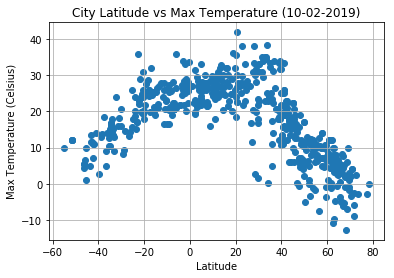

In [68]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({ts})")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_MaxTemp.png")

# Show plot
plt.show()

 ## Latitude vs. Humidity Plot


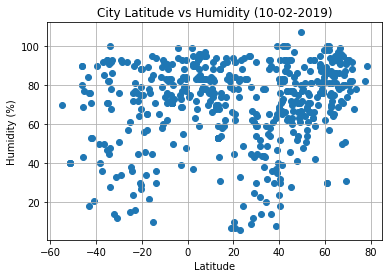

In [69]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({ts})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

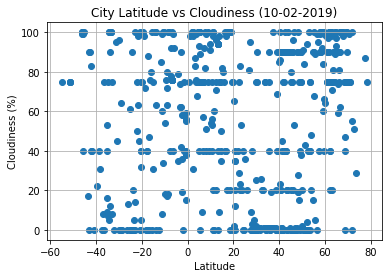

In [70]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({ts})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_Cloudiness.png")

# Show plot
plt.show()

 ## Latitude vs. Wind Speed Plot

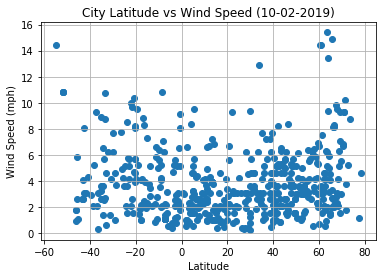

In [72]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Grab date of analysis Assistance from StackOverflow 
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

timestamp = weather_data['Date'].iloc[0]
ts=datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({ts})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLat_vs_WindSpeed.png")

# Show plot
plt.show()

In [ ]:
#split cities according to norther or souther hemishere 